# Ford GoBike Data Exploration
##### by Sarah Abdelbar

## Preliminary Wrangling

> In the hope of reducing pollution in our surrounding environment, there has been an ongoing trend for bike sharing systems over the past few years. These systems allow users to rent bikes around specified stations throughout the city. This does not only serve citizens but also tourists who want to roam around the city, sightseeing, without having to walk around all day. 
Thanks to the smart technologies, we are able to gather the data from these systems to analyze it and answers some interesting reserach questions and communicate the findings to further enhance this business.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import glob
import os
%matplotlib inline

> The data was extracted from this link http://s3.amazonaws.com/fordgobike-data
? All zip folders were then transformed into CSV and then I used the below code to merge all data and create one dataset

In [2]:
jan= pd.read_csv('201801-fordgobike-tripdata.csv')
feb = pd.read_csv('201802-fordgobike-tripdata.csv')
march = pd.read_csv('201803-fordgobike-tripdata.csv')
april = pd.read_csv('201804-fordgobike-tripdata.csv')
may = pd.read_csv('201805-fordgobike-tripdata.csv')
june = pd.read_csv('201806-fordgobike-tripdata.csv')
july = pd.read_csv('201807-fordgobike-tripdata.csv',error_bad_lines=False, low_memory=False)
august = pd.read_csv('201808-fordgobike-tripdata.csv',error_bad_lines=False, low_memory=False)
september = pd.read_csv('201809-fordgobike-tripdata.csv',error_bad_lines=False, low_memory=False)
october = pd.read_csv('201810-fordgobike-tripdata.csv',error_bad_lines=False, low_memory=False)
november = pd.read_csv('201811-fordgobike-tripdata.csv',error_bad_lines=False, low_memory=False)
december = pd.read_csv('201812-fordgobike-tripdata.csv',error_bad_lines=False, low_memory=False)

b'Skipping line 315503: expected 16 fields, saw 24\n'


In [3]:
#merging all data into one
all_filenames= [jan, feb, march, april, may, june, july, august, september, october, november, december]
combined_csv = pd.concat(all_filenames)
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [4]:
df = pd.read_csv('combined_csv.csv')

C:\Users\sabdelb\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,6,9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023431 entries, 0 to 2023430
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   object 
 6   start_station_longitude  object 
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     object 
 10  end_station_longitude    float64
 11  bike_id                  object 
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(5), object(11)
memory usage: 247.0+ MB


In [6]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1465388,777.0,2018-09-16 10:47:25.9500,2018-09-16 11:00:23.2370,240.0,Haste St at Telegraph Ave,37.866,-122.259,262.0,West St at University Ave,37.87,-122.286533,1533,Subscriber,1991.0,Female,No
1572533,472.0,2018-10-29 18:40:11.1890,2018-10-29 18:48:03.3390,341.0,Fountain Alley at S 2nd St,37.3362,-121.889,296.0,5th St at Virginia St,37.326,-121.877120,1621,Subscriber,1993.0,Male,Yes
773059,572.0,2018-06-07 23:35:15.8640,2018-06-07 23:44:48.3800,89.0,Division St at Potrero Ave,37.7692,-122.408,43.0,San Francisco Public Library (Grove St at Hyde...,37.7788,-122.415929,2723,Subscriber,1980.0,Male,Yes
1587946,722.0,2018-10-26 17:01:22.9180,2018-10-26 17:13:25.2720,350.0,8th St at Brannan St,37.7714,-122.406,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.7954,-122.394203,38,Customer,1981.0,Male,No
1382255,844.0,2018-09-28 15:33:46.4890,2018-09-28 15:47:50.9500,21.0,Montgomery St BART Station (Market St at 2nd St),37.7896,-122.401,81.0,Berry St at 4th St,37.7759,-122.393170,433,Subscriber,1983.0,Female,No


### What is the structure of your dataset?

> The dataset includes details about the trips completed in 2018 including the duration, start point, end point, as well some information about the user, like their birth date, gender and whether they are subscribers or customers.

### What is/are the main feature(s) of interest in your dataset?

> From an initial look at the data, post the data wrangling process, some potential questions might be raised concerning the age groups of users, the gender split and the behavior of each group on a monthy, weekly, and hourly basis. Such analysis can help this business become more relevant, useful and up-to-date with its right target audience.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The different columns of this dataset will be cleaned and analyzed in order to reach the optimum answer to points of interest. So far, the dataset looks detailed, although some information like members age are not given but can easily be derived from the information provided. 

## Data Assessment

In [7]:
#An initial look at the dataset and the types of data we will be dealing with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023431 entries, 0 to 2023430
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   object 
 6   start_station_longitude  object 
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     object 
 10  end_station_longitude    float64
 11  bike_id                  object 
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(5), object(11)
memory usage: 247.0+ MB


Quality & Tidiness issues

1) In order to be able to perform analysis using the month, day and hours, we need to derive such information from the start time of the trip

2) Start and end times should be of timestamp type instead of object (so the needed information can be easily derived)

3) All ID columns (start_station_id, end_station_id, bike_id) should be of type object instead of integer as they are not going to be used in any mathematical calculations

4) User information like type and gender needs to be converted to category so we can use them in categorial analysis

> One more useful step after the cleaning, is to calculate the members age in a seperate column from the date of birth, we might later need to classify all users to age groups for easier analysis.


## Data Cleaning & Testing

In [8]:
## First things first, we need to create a copy from the original dataset
df_final = df.copy()

In [9]:
#Dropping NA values to have smaller and cleaner data and to avoid errors in the calculations
df_final= df_final.dropna()

In [10]:
# changing start and end times to datetime
df_final.end_time = pd.to_datetime(df_final.end_time, errors='coerce')
df_final.start_time = pd.to_datetime(df_final.start_time, errors='coerce')

In [11]:
#Taking another look at the data as a testing step
df_final.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888773 entries, 0 to 2023429
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             1888773 non-null  float64       
 1   start_time               1888773 non-null  datetime64[ns]
 2   end_time                 1888773 non-null  datetime64[ns]
 3   start_station_id         1888773 non-null  float64       
 4   start_station_name       1888773 non-null  object        
 5   start_station_latitude   1888773 non-null  object        
 6   start_station_longitude  1888773 non-null  object        
 7   end_station_id           1888773 non-null  float64       
 8   end_station_name         1888773 non-null  object        
 9   end_station_latitude     1888773 non-null  object        
 10  end_station_longitude    1888773 non-null  float64       
 11  bike_id                  1888773 non-null  object        
 12  

In [12]:
# Dividing the datetime column to Month, Day, and hour
df_final['start_time_month']=df_final['start_time'].dt.month.astype(int)
df_final['start_time_day']=df_final['start_time'].dt.day.astype(int)
df_final['start_time_hour']=df_final['start_time'].dt.hour
df_final['start_day_name']=df_final['start_time'].dt.strftime('%a')
df_final['start_month_name']=df_final['start_time'].dt.strftime('%B')

In [13]:
# converting id columns to object (string) instead of integers
df_final.bike_id = df_final.bike_id.astype(str)
df_final.start_station_id = df_final.bike_id.astype(str)
df_final.end_station_id = df_final.bike_id.astype(str)

In [14]:
# converting user info to category instead of object
df_final.member_gender = df_final.member_gender.astype('category')
df_final.user_type = df_final.user_type.astype('category')

In [15]:
# adding a column with member age calculation from the year of birth
df_final['member_age']= 2020 - df_final['member_birth_year']

In [16]:
#I will look at two sample rows to check how the age is calculated and how the data was divided
df_final.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_month,start_time_day,start_time_hour,start_day_name,start_month_name,member_age
1680225,233.0,2018-10-12 09:58:37.257,2018-10-12 10:02:31.003,1547,Embarcadero BART Station (Beale St at Market St),37.7923,-122.397,1547,The Embarcadero at Steuart St,37.7915,...,Subscriber,1983.0,Male,Yes,10,12,9,Fri,October,37.0
886457,493.0,2018-07-21 15:33:44.530,2018-07-21 15:41:57.763,2572,17th St at Valencia St,37.7633,-122.422,2572,Jackson Playground,37.765,...,Customer,1994.0,Female,No,7,21,15,Sat,July,26.0


> One more step before starting the analysis phase, since we are going to be deadling with members age, we need to check if we have outliers, so we don't mess up the visualizations that are concerned with the main target audience. I will first check the mean of the age, double that number, and assume that all members with age more than double the average are outliers. 

In [17]:
df_final['member_age'].mean()

36.8721519208502

In [18]:
#The age mean is 36, let's check if we have inputs with users more than double the mean, which is 70
df_final.loc[df_final.member_age> 70 , ['member_age']]
#There are 9887 values that we are going to drop to reduce the size of data 
#(small percentage from dataset, which means they can be considered as outliers)

,member_age
22,75.0
93,109.0
298,77.0
622,84.0
1042,71.0
...,...
2022952,72.0
2022963,120.0
2022977,73.0
2023050,72.0


In [19]:
#Dropping the outliers
to_drop = df_final[df_final.member_age >70].index.tolist()
df_final.drop(to_drop,axis = 0, inplace=True)
df_final.reset_index(inplace=True, drop=True)

In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878886 entries, 0 to 1878885
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   object        
 6   start_station_longitude  object        
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     object        
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
 16  start_time_month         int32         
 17  start_time_day           in

In [21]:
## Data Analysis and Exploration

Throughout the data wrangling process, the different columns and entries in the dataset were assessed and cleaned, and now it's time to answer some research questions.
* What's the monthly trend throughout 2018? Which seasons/months were the most trips taken?
* What's the ratio of subscribers to customers?
    * What's the average trip duration for each?
    * What's the weekly trend for each? Do they use the bike sharing system during weekdays or weekend?
    * What's the hourly trend for each? Do most of the trips happen in the day or in the evening? What does that say about the objective of bike usage for each group?
    * What's the split of genders for the users in each group (subscribers and customers)?
* How does the distribution of number of trips completed by age group look like?

## Univariate Exploration

###  Exploring Monthly trends

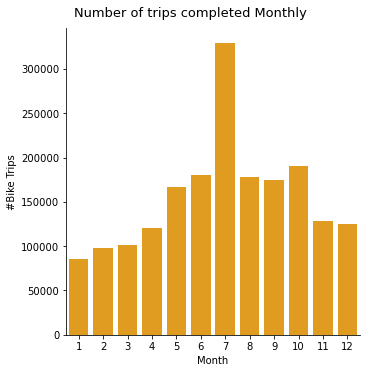

In [22]:
# Let's first investigate what's the distribution of number of trips completed looks like in 2018 throughout the months.
ax = sb.catplot(data=df_final, x='start_time_month', kind='count', color='orange')
ax.set_axis_labels("Month", "#Bike Trips")
ax.fig.suptitle('Number of trips completed Monthly', y=1.03, fontsize=13, fontweight='light');

It seems that, in 2018, during the month of july, there is a spike in demand for bike sharing. 
Other months like May, June, and August also have higher demand than usual, this might be associated to the summer season where the weather is better and more convenient to user the bike as opposed to the winter where it might be windy, cold or even raining. 

### Split of Users - Susbcribers vs Customers

In [23]:
# First, we need to calculate the percentage of users for each type from the total
# we use the query and count functions to get the number of subscribers an customers
subscriber_count = df_final.query('user_type == "Subscriber"')['bike_id'].count()
customer_count = df_final.query('user_type == "Customer"')['bike_id'].count()

# Then, we divide by the total count of bikes to get the percentage
subscriber_percentage = subscriber_count / df_final['bike_id'].count()
customer_percentage = customer_count / df_final['bike_id'].count()

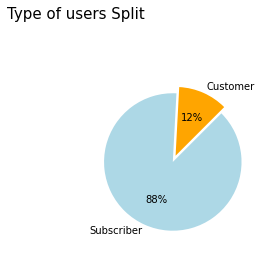

In [24]:
# we can now plot the numbers in a pie chart to visualize the split of all users to each type
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_percentage, subscriber_percentage]
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = ['orange', 'lightblue'],
        autopct='%1.0f%%', shadow=False, startangle=45)
plt.axis('equal')

plt.suptitle('Type of users Split', y=1.03, fontsize=15, fontweight='light');

### Age Groups using the bike system

In [25]:
#ww create a new column that would classify each user to the convenient age group based on member_age column
df_final['age_group'] = df_final['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60 - 70' if 60<x<=70
                                                  else x)

In [26]:
age_group= df_final.groupby('age_group').agg({'bike_id':'count'})

In [27]:
age_group['percentage'] = (age_group['bike_id']/age_group['bike_id'].sum())*100

In [28]:
#checking the resulting data
age_group

,bike_id,percentage
age_group,,
10 - 20,5702,0.303478
20 - 30,560222,29.816711
30 - 40,782161,41.628976
40 - 50,317262,16.885644
50 - 60,165569,8.812083
60 - 70,47970,2.553109


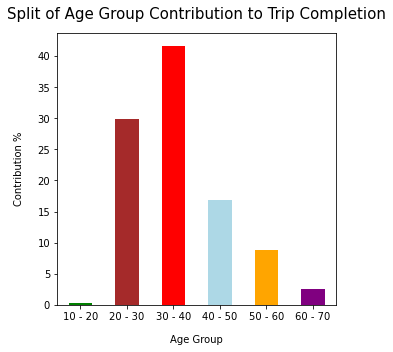

In [29]:
#now we plot the percentage of the contribution of each age group to the overall trips
age_group['percentage'].plot(kind='bar', color=['green', 'brown', 'red', 'lightblue', 'orange','purple'], figsize=(5,5))
plt.title('Split of Age Group Contribution to Trip Completion', fontsize=15, y=1.03,fontweight='light')
plt.xlabel('Age Group', labelpad=13)
plt.xticks(rotation=0)
plt.ylabel('Contribution %', labelpad=13);

From the chart above, it seems that most users are thirty to forty years of age. The second most common age group that uses the bikes are 20-30 years old.
It might be useful to look at the trend by month to get a feel of the behavior of each group throughout the different months of the year

### Monthly Behavior of each Age Group

In [30]:
customer_df = df_final[df_final['user_type']=='Customer'].groupby(['start_time_month', 'age_group']).agg({'bike_id':'count'}).reset_index()
customer_df

,start_time_month,age_group,bike_id
0,1,10 - 20,2
1,1,20 - 30,1988
2,1,30 - 40,2883
3,1,40 - 50,842
4,1,50 - 60,458
...,...,...,...
67,12,20 - 30,4922
68,12,30 - 40,5495
69,12,40 - 50,1903
70,12,50 - 60,972


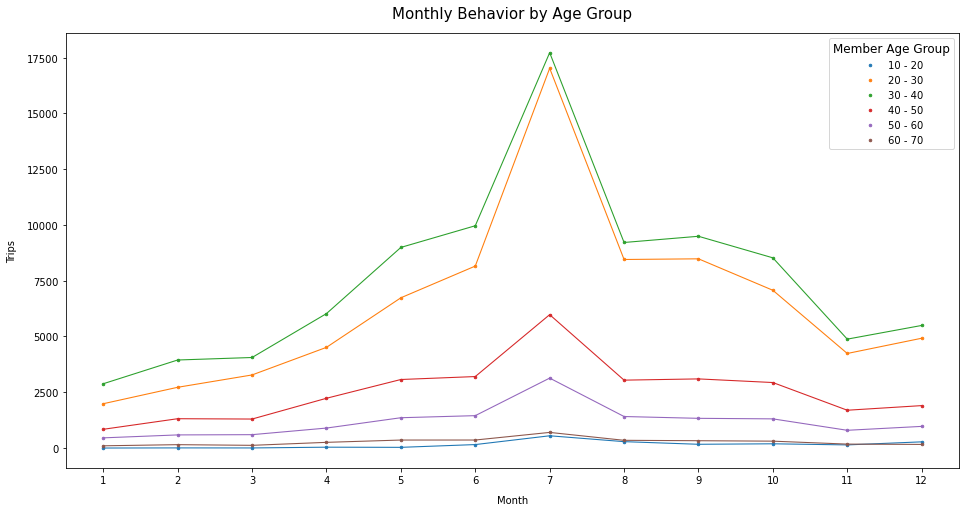

In [31]:
plt.figure(figsize=(16,8))
ax = sb.pointplot(x='start_time_month', y='bike_id', hue='age_group', scale=.4, data=customer_df)
plt.title("Monthly Behavior by Age Group", fontsize=15, y=1.02,fontweight='light')
plt.xlabel('Month', labelpad=10)
plt.ylabel('Trips', labelpad=10)
leg = ax.legend()
leg.set_title('Member Age Group',prop={'size':12})

From the above visual, it seems that the behavior of the two most common age groups 30-40 and 20-30 are quite similar. 
The frequency of using the system increases significanty during the month of July. As mentioned before, this can be assumed to be due to seasonality, however, we need to look at the hourly rates of using the bikes throughout the day to link them to working hours and other factors. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In this section, we explored the behavior throughout the months of all users, and we had a closer look at this behavior split by age group. We also looked at the average duration of trips by age group, and the split of users between subscribers and customers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most of the data editing was performed before the analysis. For instance, we had to calculate the members age using the year of birth, we also had to put them in age groups. 

## Bivariate Exploration

> In this section, we will further investigate the data by analyzing pairs of variables and comparing their results.

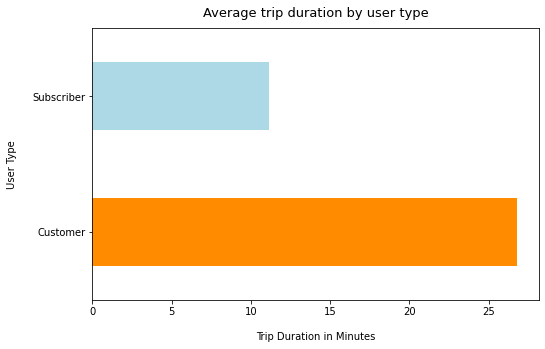

In [32]:
## Diving deeper into each type's consumer behavior, let's see the average duration of the trips completed by each user category
df_final['duration_minutes'] = df_final['duration_sec']/60
new_color=['darkorange', 'lightblue']
ax = df_final.groupby('user_type')['duration_minutes'].mean().plot(kind='barh', color=new_color, figsize=(8,5))
ax.set_title('Average trip duration by user type', fontsize=13, y=1.02,fontweight='light')
ax.set_ylabel('User Type', labelpad=15)
ax.set_xlabel('Trip Duration in Minutes', labelpad=15);

It seems that a subscriber would spend a little bit over an average of 10 minutes on the bike, while a customer would spend more than 25 minutes. 
This might mean that subscribers would mostly use this service to commute to work and back, while customers just enjoy a good portion of their day out on the bike for leisure purposes. This can be further explored in the more-in-depth analysis down below.

### Distribution of trips throughout the week

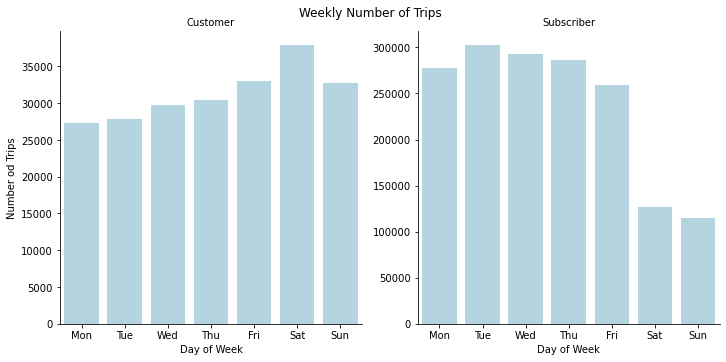

In [33]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_final, x='start_day_name', col="user_type", kind='count', sharey = False,
            color = 'lightblue', order = days)
g.set_axis_labels("Day of Week", "Number od Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly Number of Trips', y=1, fontsize=12, fontweight='light');

As expected, subscribers use the service on weekdays more than weekends, while customers use the bikes on weekends the most. Which, again, supports the assumption made earlier that users subscribe to this service to use it to commute to work. However, in order to ensure we are making an informed assumption, let's look at the exact hours during which members and customers would take their rides.

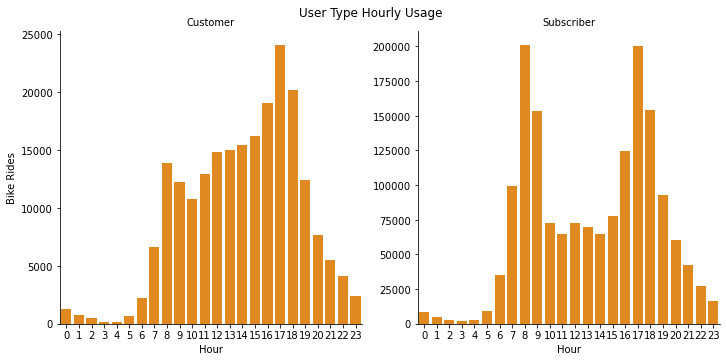

In [34]:
g = sb.catplot(data=df_final, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = 'darkorange')
g.set_axis_labels("Hour", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('User Type Hourly Usage', y=1, fontsize=12, fontweight='light');

Again, the above charts support the assumption we have been discussing, because apparently subscribers use their bikes the most from 7AM-9AM and then again from 5PM-7PM. These are mostly the rush hours for employees to go to and back from work. 
Customers, however, either use the bikes during the day (and we have previsouly seen how they mostly use it during weekends) for leisure purposes, or use them post working hours (starting 6pm)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this section, we were mostly trying to dive deeper in the behavior of each user type. We started by calculating the average trip duration to get a feel of how much time each type spends on the bike. Then, we further explored the days of the week, as well as the time of the day, where most trips take place.

> As a general conclusion, it's safe to say that people who subscribe to this service would usually take it as a way to commute to and from work, while others just use it for Leisure purposes on weekends and post the working hours.

## Multivariate Exploration

> In this section, we are going to look at the gender split for bike users. 

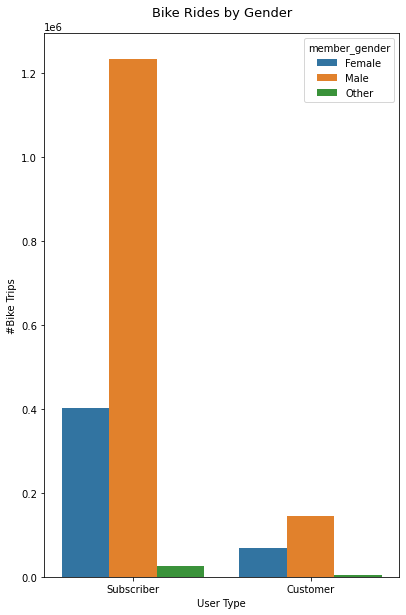

In [35]:
#we start by checking the number of trips completed by each gender, in both user types. 
plt.figure(figsize = [14, 10])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sb.countplot(data=df_final, x="user_type", hue="member_gender", order=df_final.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')
g.set_title('Bike Rides by Gender', y=1.02, fontsize=13, fontweight='light');

From the charts dealing with the gender split, it seems that the males are dominating both the subscribers and the customers portions of the user types. We might need further analysis to investigate why this is the case but an initial assumption can be made, linking all observations to each other, claiming that the males might be dominating the working class. Which would make sense given that they have the highest contribution in trips completed by subscribers, which were proven to be using the bikes to commute to work. 

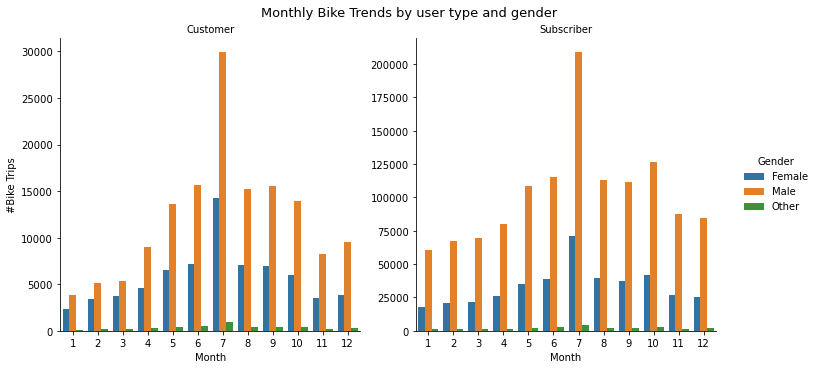

In [36]:
#Cheking the behavior of each gender throughout the months of 2018 by user type
g = sb.catplot(data=df_final, x='start_time_month', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Month", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly Bike Trends by user type and gender', y=1.02, fontsize=13, fontweight='light');

It seems that for both customers and subscribers, all genders have similar trends throughout the year. Given our initial assumption that this depends on the seasonality, where summer months are the months where most of the trips take place, seeing similar trends across genders makes sense as the weather has nothing to do with the gender of the user.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this part, we split the user types into genders to check if there is any assumptions or conclusions that can be drawn of the behavior of each from the data. It seems however that all genders have similar trends whether they are subscribers or customers. However, there were interesting findings regarding the gender split in general. 

### Were there any interesting or surprising interactions between features?

> I was surprised to see that males dominate the subsribers category of the user, which was proven earlier to mostly use the service to commute to work. This might give us an insight that males dominate the working class. This is a general assumption, however, that I recommend to be proven using deeper analysis including more factors to be able to reach a final conclusion in this topic.

In [37]:
## df_final.to_csv('df_final.csv',encoding='utf-8',index=False)

In [38]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878886 entries, 0 to 1878885
Data columns (total 24 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   object        
 6   start_station_longitude  object        
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     object        
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
 16  start_time_month         int32         
 17  start_time_day           in